# Part 1: Scrape reviews from https://www.imdb.com/

In [1]:
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select

from bs4 import BeautifulSoup
import requests
import time

import pandas as pd
import numpy as np
import datetime as dt 

import matplotlib.pyplot as plt 
import seaborn as sns


import pickle
import os

pd.options.display.max_columns=100
plt.style.use('ggplot')


headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}


path=r"C:\Users\berid\python\RottenTomatoes Project"

In [2]:
driver=webdriver.Edge()
driver.maximize_window()

initial_page="https://www.imdb.com/search/title/?title_type=feature&release_date=2024-01-01,2024-12-31&user_rating=6.5,&num_votes=2000,&languages=en&sort=num_votes,desc"

driver.get(initial_page)

In [3]:
while True:
    try:

        load_more_button=WebDriverWait(driver,10).until(expected_conditions.element_to_be_clickable((By.CSS_SELECTOR,'span[class="ipc-see-more__text"]')))
        time.sleep(1)
        driver.execute_script('arguments[0].scrollIntoView();',load_more_button)
        time.sleep(1)
        driver.execute_script('arguments[0].click();',load_more_button)
        time.sleep(1)
    except:
        break


movie_urls=[]

movie_url_elements=driver.find_elements(By.CSS_SELECTOR,'div[class="ipc-page-grid__item ipc-page-grid__item--span-2"] li[class="ipc-metadata-list-summary-item"] a:nth-child(1)')
for movie_url_element in movie_url_elements:
    try:
        movie_url=movie_url_element.get_attribute('href')
        movie_urls.append(movie_url)
    except:
        continue

In [4]:
movie_urls=list(set(movie_urls))
len(movie_urls)

55

In [5]:
all_data=[]

for i,movie_url in enumerate(movie_urls,start=1):
    try:

        #go to reviews page
        driver.get(movie_url)
        driver.maximize_window()
        time.sleep(1)
        driver.execute_script("document.body.style.zoom = '50%'")
        time.sleep(1)

        try:
            overall_rating=driver.find_element(By.CSS_SELECTOR,'div[class="sc-3a4309f8-1 dOjKRs"] span[class="ipc-btn__text"]').get_attribute('textContent').replace('\n','').strip()
        except:
            overall_rating=None

        reviews_page=driver.find_element(By.CSS_SELECTOR,'section[data-testid="UserReviews"] div[class="ipc-title__wrapper"] a')
        driver.execute_script('arguments[0].click();',reviews_page)
        time.sleep(2)

        #scroll down till possible
        while True:
            try:
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

                laod_more_reviews_buttom=driver.find_element(By.CSS_SELECTOR,'div[class="ipl-load-more ipl-load-more--loaded"] button[class="ipl-load-more__button"]')
                driver.execute_script('arguments[0].click();',laod_more_reviews_buttom)
                time.sleep(1)
            except:
                break

        #define soup object
        html=driver.page_source
        soup=BeautifulSoup(html,'html.parser')

        try:
            title=soup.select_one('div[class="subpage_title_block__right-column"] div[class="parent"] h3[itemprop="name"]').text.replace('\n','').strip()
        except:
            title=None

        try:
            poster=soup.select_one('div[class="subpage_title_block"] a img')['src']
        except:
            poster=None

        

        comment_elements=soup.select('div[class="lister-list"] div[class="review-container"]')
        for comment_element in comment_elements:
            try:
                rating_given=comment_element.select_one('div[class="ipl-ratings-bar"]').text.replace('\n','')
            except:
                rating_given=None

            try:
                user_and_date=comment_element.select_one('div[class="display-name-date"]').get_text(separator='|').replace('\n','')
            except:
                user_and_date=None

            try:
                text=comment_element.select_one('div[class="content"] div').text.replace('\n','')
            except:
                text=None

            dict={'Movie URL':movie_url,'Title':title,'Poster':poster,'Overall Rating':overall_rating,'User And Date':user_and_date,'Rating Given':rating_given,'Review Content':text}
            all_data.append(dict)

        print(f'Number of movies scraped: {i}',end='\r')
        
    except:
        print(f'Failed: {movie_url}')
        continue


Failed: https://www.imdb.com/title/tt27489557/?ref_=sr_t_13
Failed: https://www.imdb.com/title/tt19864802/?ref_=sr_t_20


In [6]:
df=pd.DataFrame(all_data)

In [7]:
#df.to_csv(os.path.join(path,'best_IMDB_mvoies_2024.csv'),index=False)

In [9]:
df

,Movie URL,Title,Poster,User And Date,Rating Given,Review Content
0,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,|yasmeenmihyar|10 August 2024|,6/10,"In a few words: great message, stunning visual..."
1,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,|ekdecarvalho|13 August 2024|,6/10,Another actress should have been casted as Lil...
2,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,|kristyp81|8 August 2024|,6/10,"They went soft on the DV ...too arty, and did ..."
3,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,|jaysonpajaronvistal|12 August 2024|,None,"""It Ends With Us,"" the first Colleen Hoover no..."
4,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,|debbieapereira|15 August 2024|,6/10,"As someone that has read the book, I felt that..."
...,...,...,...,...,...,...
5083,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,|Cathbadhian|3 August 2024|,8/10,"Deadpool arrives with a blast of comedy, actio..."
5084,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,|carlos_mireles|26 July 2024|,10/10,This was amazing! I couldn't have been happier...
5085,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,|lorenceyou|26 July 2024|,9/10,It is indeed one of the best movie experience ...
5086,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,|anulika-33737|24 July 2024|,10/10,This is a huge comeback for marvel and when I ...


# Part 2: Cleaning data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt 

import matplotlib.pyplot as plt 
import seaborn as sns


import pickle
import os

pd.options.display.max_columns=100
plt.style.use('ggplot')

path=r"C:\Users\berid\python\RottenTomatoes Project"

In [2]:
df=pd.read_csv(os.path.join(path,'best_IMDB_mvoies_2024.csv'))

In [4]:
df.isna().mean()

Movie URL         0.000000
Title             0.000000
Poster            0.000000
User And Date     0.000000
Rating Given      0.022602
Review Content    0.000000
dtype: float64

In [5]:
df.nunique()

Movie URL           53
Title               53
Poster              53
User And Date     5037
Rating Given        10
Review Content    5088
dtype: int64

In [6]:
df['Title']=df['Title'].apply(lambda x:' ('.join([i.strip() for i in x.split('(')]))

In [7]:
user=df['User And Date'].apply(lambda x: x.strip().split('|')[1])
date=df['User And Date'].apply(lambda x: x.strip().split('|')[-2]).apply(pd.to_datetime)

df.insert(df.columns.get_loc('User And Date')+1,'Username',user)
df.insert(df.columns.get_loc('User And Date')+2,'Date',date)

df=df.drop(columns='User And Date')

In [8]:
df['Rating Given']=df['Rating Given'].apply(lambda x:x.split('/')[0] if isinstance(x,str) else None).apply(pd.to_numeric)

In [9]:
df

,Movie URL,Title,Poster,Username,Date,Rating Given,Review Content
0,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,yasmeenmihyar,2024-08-10,6.0,"In a few words: great message, stunning visual..."
1,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,ekdecarvalho,2024-08-13,6.0,Another actress should have been casted as Lil...
2,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,kristyp81,2024-08-08,6.0,"They went soft on the DV ...too arty, and did ..."
3,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,jaysonpajaronvistal,2024-08-12,NaN,"""It Ends With Us,"" the first Colleen Hoover no..."
4,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,debbieapereira,2024-08-15,6.0,"As someone that has read the book, I felt that..."
...,...,...,...,...,...,...,...
5083,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,Cathbadhian,2024-08-03,8.0,"Deadpool arrives with a blast of comedy, actio..."
5084,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,carlos_mireles,2024-07-26,10.0,This was amazing! I couldn't have been happier...
5085,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,lorenceyou,2024-07-26,9.0,It is indeed one of the best movie experience ...
5086,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,anulika-33737,2024-07-24,10.0,This is a huge comeback for marvel and when I ...


In [10]:
df.to_csv(os.path.join(path,'best_IMDB_mvoies_2024 (cleaned).csv'),index=False)

# Part 3 : EDA

In [1]:
import pandas as pd
import numpy as np
import datetime as dt 

import matplotlib.pyplot as plt 
import seaborn as sns


import pickle
import os

from IPython.display import Image, display
from IPython.core.display import HTML


pd.options.display.max_columns=100
plt.style.use('ggplot')

path=r"C:\Users\berid\python\RottenTomatoes Project"

In [2]:
df=pd.read_csv(os.path.join(path,'best_IMDB_mvoies_2024 (cleaned).csv'))

In [4]:
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [5]:
def get_comment_sentiment_scores(comment):
    comment_tokenized=nltk.word_tokenize(comment)
    comment_lower=[w.lower() for w in comment_tokenized]
    comment_lemmatized=[lemmatizer.lemmatize(w) for w in comment_lower]
    comment_filtered=[w for w in comment_lemmatized if w not in stopwords]
    final_comment=' '.join(comment_filtered)
    
    score=sia.polarity_scores(final_comment)

    return score

In [ ]:
scores=[]

length=df['Review Content']


for i, content in enumerate(length,start=1):
    try:
        score=get_comment_sentiment_scores(content)
    except:
        score=None

    scores.append(score)

    if i%1000==0 or i==len(length):
        print(f'Progress: {i}/{len(length)}',end='\r')

In [6]:
#pickle.dump(scores,open(os.path.join(path,'sentiment_scores.pickle'),'wb'))
scores=pickle.load(open(os.path.join(path,'sentiment_scores.pickle'),'rb'))

In [7]:
compound_scores=[i['compound'] if i else None for i in scores]

In [8]:
df['Sentiment Score']=compound_scores

In [9]:
df

,Movie URL,Title,Poster,Username,Date,Rating Given,Review Content,Sentiment Score
0,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,yasmeenmihyar,2024-08-10,6.0,"In a few words: great message, stunning visual...",0.9182
1,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,ekdecarvalho,2024-08-13,6.0,Another actress should have been casted as Lil...,0.8442
2,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,kristyp81,2024-08-08,6.0,"They went soft on the DV ...too arty, and did ...",0.4184
3,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,jaysonpajaronvistal,2024-08-12,NaN,"""It Ends With Us,"" the first Colleen Hoover no...",0.9931
4,https://www.imdb.com/title/tt10655524/?ref_=sr...,It Ends with Us (2024),https://m.media-amazon.com/images/M/MV5BYzM2NG...,debbieapereira,2024-08-15,6.0,"As someone that has read the book, I felt that...",-0.8512
...,...,...,...,...,...,...,...,...
5083,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,Cathbadhian,2024-08-03,8.0,"Deadpool arrives with a blast of comedy, actio...",0.9246
5084,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,carlos_mireles,2024-07-26,10.0,This was amazing! I couldn't have been happier...,0.8099
5085,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,lorenceyou,2024-07-26,9.0,It is indeed one of the best movie experience ...,0.9880
5086,https://www.imdb.com/title/tt6263850/?ref_=sr_t_2,Deadpool & Wolverine (2024),https://m.media-amazon.com/images/M/MV5BNzRiMj...,anulika-33737,2024-07-24,10.0,This is a huge comeback for marvel and when I ...,0.9899


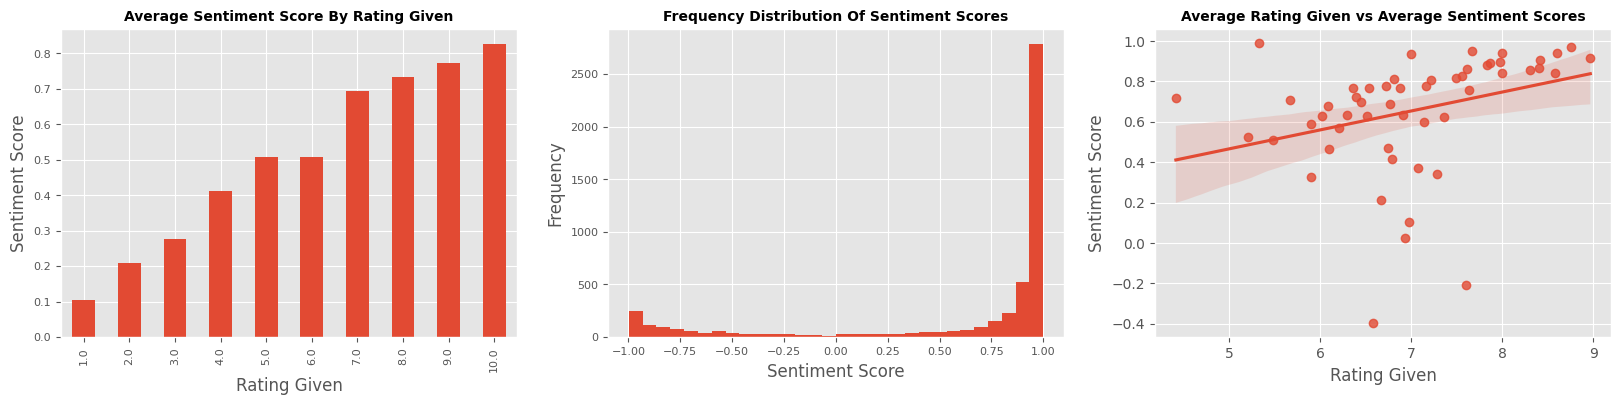

In [10]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))

df.groupby('Rating Given')['Sentiment Score'].mean().plot.bar(ax=ax1,fontsize=8)
ax1.set_ylabel('Sentiment Score')
ax1.set_title('Average Sentiment Score By Rating Given',fontweight='bold',size=10)

df['Sentiment Score'].plot.hist(bins=30,fontsize=8,ax=ax2)
ax2.set_xlabel('Sentiment Score')
ax2.set_title('Frequency Distribution Of Sentiment Scores',fontweight='bold',size=10)

g=df.groupby('Title')[['Rating Given','Sentiment Score']].mean()
sns.regplot(g,x='Rating Given',y='Sentiment Score',scatter=True,ax=ax3)
ax3.set_title('Average Rating Given vs Average Sentiment Scores',fontweight='bold',size=10)

plt.show()

In [13]:
#5 mvoies with most reviews in 2024

df.groupby('Title')['Review Content'].count().sort_values(ascending=False).head(5)

Title
Beverly Hills Cop: Axel F (2024)                541
Longlegs (2024)                                 425
The Ministry of Ungentlemanly Warfare (2024)    387
Furiosa: A Mad Max Saga (2024)                  350
The First Omen (2024)                           275
Name: Review Content, dtype: int64

In [42]:
g=df.groupby(['Title','Poster']).agg({'Sentiment Score':['mean','count']}).sort_values(by=('Sentiment Score','mean'),ascending=False)
g=g.reset_index()
g['Poster']=g['Poster'].apply(lambda x:f'<img src="{x}" width="100"/>')

HTML(g.to_html(escape=False))

In [ ]:
#import subprocess

# Run nbmerge command directly
#subprocess.run(['nbmerge', 'scrape.ipynb', 'cleaning.ipynb', 'EDA.ipynb', '-o', 'combined_notebook.ipynb'], check=True)
